In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

%matplotlib inline
%run f2forecast.py
import xlwings as xw

In [27]:
df = pd.read_excel("Data.xlsx", parse_dates=['Data'])  


In [28]:
df.index = list(df["Unnamed: 0"])

In [29]:
df.head()

,Unnamed: 0,Data,Te,U,Рабочий/Выходной,КвадратТемпературы,Тренд,0,1,2,...,Th,F,Sa,Su,Peak,Потребление,Ставка,СтавкаМощность,Ставка(t-1),Daylength
0,0,2019-01-01 00:00:00,-24.1,76.0,1,580.81,0,1,0,0,...,0,0,0,0,0,9949.179,2169.01,649124,2171.798333,7.48
1,1,2019-01-01 01:00:00,-24.1,76.0,1,580.81,1,0,1,0,...,0,0,0,0,0,10082.712,2173.00,649124,2168.828333,7.48
2,2,2019-01-01 02:00:00,-24.1,76.0,1,580.81,2,0,0,1,...,0,0,0,0,0,10069.857,2173.58,649124,2171.863333,7.48
3,3,2019-01-01 03:00:00,-22.6,77.0,1,510.76,3,0,0,0,...,0,0,0,0,0,10217.223,2168.62,649124,2171.733333,7.48
4,4,2019-01-01 04:00:00,-22.6,77.0,1,510.76,4,0,0,0,...,0,0,0,0,0,10234.131,2155.57,649124,2165.923333,7.48


<p>Целевая величина -  Потребление </p>

Основные статистики ряда.

In [37]:
df.describe()

,Unnamed: 0,Te,U,Рабочий/Выходной,КвадратТемпературы,Тренд,0,1,2,3,...,Th,F,Sa,Su,Peak,Потребление,Ставка,СтавкаМощность,Ставка(t-1),Daylength
count,8016.000000,8016.000000,8013.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,...,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000
mean,4007.500000,3.641804,65.309996,0.715569,203.465288,4007.500000,0.041667,0.041667,0.041667,0.041667,...,0.143713,0.143713,0.143713,0.140719,0.028069,10858.115713,1903.116228,597712.916168,1903.128177,12.498623
std,2314.164212,13.792254,19.806496,0.451171,220.938081,2314.164212,0.199839,0.199839,0.199839,0.199839,...,0.350820,0.350820,0.350820,0.347753,0.165180,2518.962750,268.868261,28135.665558,265.101835,2.892690
min,0.000000,-37.700000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4514.877000,1012.410000,556138.000000,1012.410000,7.480000
25%,2003.750000,-5.000000,52.000000,0.000000,24.010000,2003.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8950.687000,1742.257500,569995.000000,1725.142500,10.020000
50%,4007.500000,4.800000,68.000000,1.000000,136.890000,4007.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10727.895500,2021.945000,595803.000000,2020.730000,12.505000
75%,6011.250000,14.800000,80.000000,1.000000,302.760000,6011.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12547.181000,2089.565000,615719.000000,2089.510000,15.280000
max,8015.000000,30.500000,99.000000,1.000000,1421.290000,8015.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,18522.542000,2255.040000,649124.000000,2243.466667,16.470000


Count – количество значений в датасете.

Mean – среднее значение по ряду.

Std – стандартная ошибка.

Min – минимальное значение.

25%, 50%, 75% - значения границ квартилей. 50% - это не что иное, как медиана. В нормально распределенных не смещенных данных, как правило, медиана и среднее значение близки друг к другу.

Max – максимальное значение.



<h1>Декомпозиция</h1>
Декомпозиция на основе тренда и сезонности
Выделяют три модели представления временного ряда. Аддитивная

(Yt)=Tt+St+et

Мультипликативная

(Yt)=Tt×St×et

Смешанная

(Yt)=(Tt+et)×St

где

(Yt ) ̂- прогнозное значение;
T – основной сигнал ряда;
S – коэффициент сезонности;
e – остатки (ошибка).

In [45]:
firstMonth = df[0:744]


Text(0.5, 0.98, 'Мультипликативная модель')

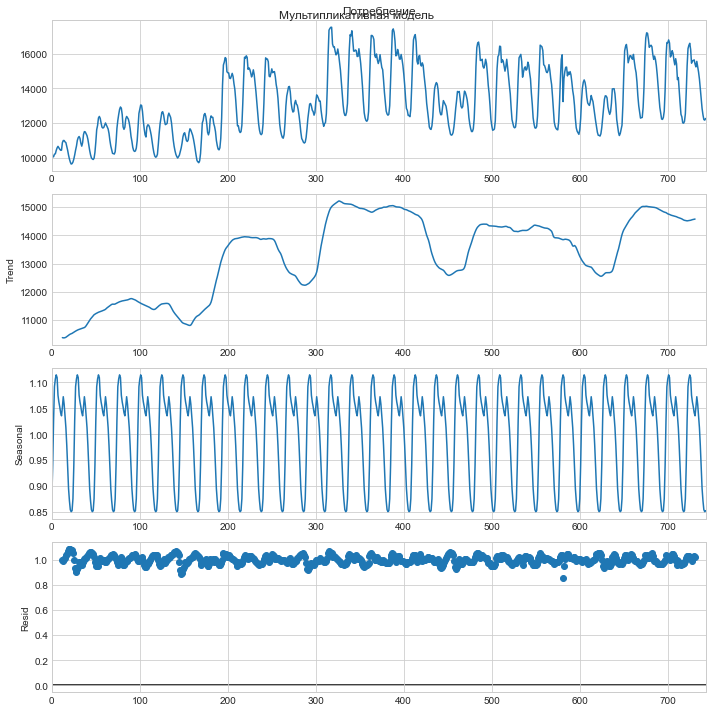

In [47]:
# декомпозиция 
result_M = seasonal_decompose(firstMonth['Потребление'], model='multiplicative', freq=24)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультипликативная модель')

Text(0.5, 0.98, 'Адитивная модель')

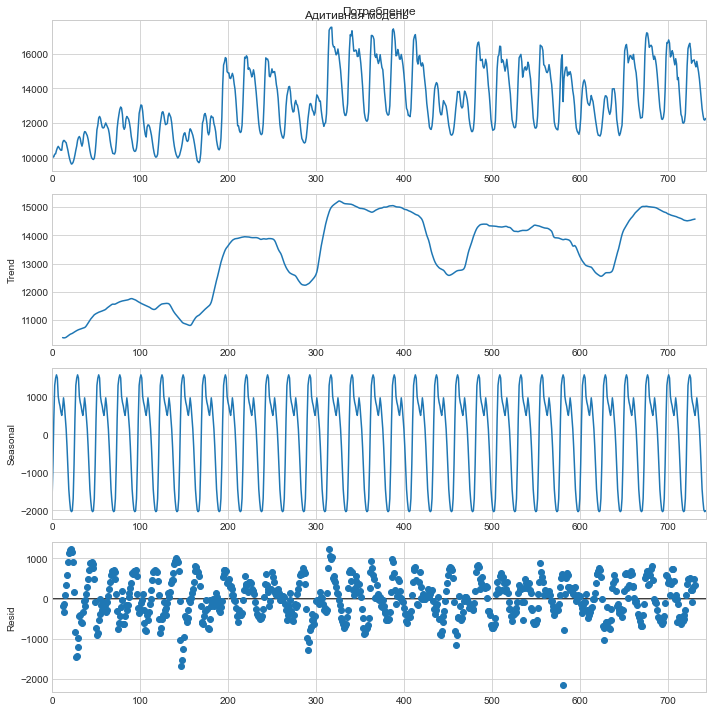

In [48]:
# Decompose 
result_A = seasonal_decompose(firstMonth['Потребление'], model='additive', freq=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')

<h1>Корреляционный анализ.Множественная регрессия</h1>
Разделим переменные на целевую и объясняющие.

In [62]:
col=[#'Data', 'Потребление', 
     'Ставка', 'Te',# 'Po ', ' P ','Pa ','Ff ',
     ' U ', 'Рабочий/Выходной', 'КвадратТемпературы', #'Тренд',
       #'СтавкаМощн',
    #'Месяц', 
    'Ставка(t-1)',
    #'0',
    '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', 'M', 'T', 
    #'W',
    'Th', 'F', 'Sa',
    'Su',
       #'Sunrise', 'Sunset', 
    'Daylength',
    #"Праздник",
    'Peak'
]
f1 = firstMonth[col]

In [63]:
model = sm.OLS(firstMonth['Потребление'], sm.add_constant(f1))
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            Потребление   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     71.59
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          2.44e-209
Time:                        20:30:40   Log-Likelihood:                -6123.1
No. Observations:                 744   AIC:                         1.232e+04
Df Residuals:                     707   BIC:                         1.249e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3536.1049   3461

**BIC** - информационный критерий. Похож на AIC, но имеет более высокий штраф для моделей с большим количеством параметров. Чем меньше значение, тем лучше.

**Omnibus** - тест на асимметрию и эксцесс остатков. Мы надеемся увидеть значение, близкое к нулю, которое указывало бы на нормальность. The Prob (Omnibus) выполняет статистический тест, показывающий вероятность того, что остатки нормально распределены. Мы надеемся увидеть здесь что-то близкое к 1. В случае если Omnibus относительно низок, а Prob (Omnibus) относительно высок, остатки в целом нормальны, но не идеальны. Подход с линейной регрессией, вероятно, будет лучше, чем случайное угадывание, но, вероятно, хуже нелинейных подходов.

**Skew** - мера симметрии данных. Мы хотим видеть что-то близкое к нулю, это указывает на то, что остаточное распределение нормально.

**Kurtosis** - это мера «пиковости» или кривизны данных. Более высокие пики приводят к большему куртозу. Большой куртоз можно интерпретировать как более плотную кластеризацию остатков около нуля, что подразумевает лучшую модель с небольшим количеством выбросов (т.е. чем больше, тем лучше).

**Cond. No.** - значения больше 20 вызывают подозрения в мультиколлинеарности. Чаще всего сложно пройти данный тест. Чем меньше, тем лучше.

**R2** - насколько переменные хорошо объясняют разброс оценок. Максимальное значение – 1. Но при значениях более 0,9 надо крайне внимательно проверить на эффект мультиколлинеарности.

**Durbin-Watson** - тест на наличие автокорреляции в остатках. В идеале значение должно стремиться к 2 (минимальное значение – 0, максимальное – 4). Значения меньше 0,8 однозначно указывают на циклические колебания в остатках. Эмпирически считается, что статистика лежит в нормальных пределах, если больше 1,5 и меньше 2,5.

**Jarque-Bera (JB)** - тест на нормальность остатков. Используется на больших наборах данных, более 2000. По своей сути аналогичен Omnibus.

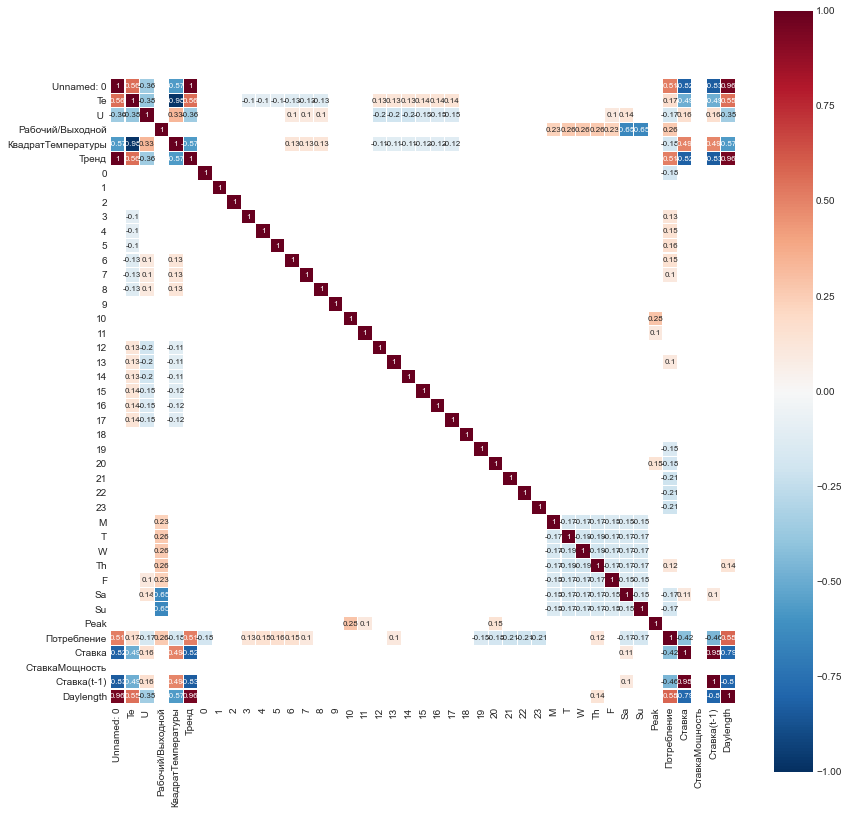

In [64]:
h_map(firstMonth, 0.1)

<h1>RandomForest</h1>

In [65]:
warnings.filterwarnings('ignore')
inputdf = firstMonth.filter(items=[#'Data', 
    'Потребление', 
     'Ставка', 'Te',# 'Po ', ' P ','Pa ','Ff ',
     ' U ', 'Рабочий/Выходной', 'КвадратТемпературы', #'Тренд',
       #'СтавкаМощн',
    #'Месяц', 
    'Ставка(t-1)',
    #'0',
    '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', 'M', 'T', 
    #'W',
    'Th', 'F', 'Sa',
    'Su',
       #'Sunrise', 'Sunset', 
    'Daylength',
    #"Праздник",
    'Peak'
])
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
#features.columns
# Метки - это значения, которые мы хотим предсказать
labels = np.array(features['Потребление'])
# Удалить ярлыки из функций
# ось 1 относится к столбцам
features= features.drop('Потребление', axis = 1)
# Сохранение имен объектов для последующего использования
feature_list = list(features.columns)
# Преобразовать в массив NumPy
features = np.array(features)
# Использование Scikit-learn для разделения данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
# Разделить данные на обучающие и тестовые наборы
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.0849,random_state = 100)
print('Форма признаков обучения:', train_features.shape)
print('Форма меток обучения:', train_labels.shape)
print('Форма признаков тестирования:', test_features.shape)
print('Форма меток тестирования:', test_labels.shape)

Форма признаков обучения: (680, 37)
Форма меток обучения: (680,)
Форма признаков тестирования: (64, 37)
Форма меток тестирования: (64,)


In [66]:
# Импортируем используемую модель
from sklearn.ensemble import RandomForestRegressor
# Создание модели с 100 деревьями решений
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
# Обучаем модель по выборки обучения
rf.fit(train_features, train_labels);

# Используйте метод прогнозирования леса на тестовых данных
predictions = rf.predict(test_features)
# Рассчитать абсолютные ошибки
errors = abs(predictions - test_labels)
# Вывести среднюю абсолютную ошибку (мАе)
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')


# Рассчитать среднюю абсолютную процентную ошибку (MAPE)
mape = 100 * (errors / test_labels)
# Расчет и отображение точности
accuracy = 100 - np.mean(mape)
print('Точность:', round(accuracy, 2), '%.')
# Импорт инструментов, необходимых для визуализации
from sklearn.tree import export_graphviz
#import pydot
# Вытащи одно дерево из леса
tree = rf.estimators_[5]

# Получить числовые значения функций
importances = list(rf.feature_importances_)
# Список кортежей с переменной и важностью
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Сортировать значения функций по наиболее важным
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Распечатать функцию и значение
[print('Переменные: {:20} Важность: {}'.format(*pair)) for pair in feature_importances];

Средняя абсолютная ошибка: 345.64 кВт.
Точность: 97.25 %.
Переменные: Daylength            Важность: 0.44
Переменные: Рабочий/Выходной     Важность: 0.11
Переменные: Ставка               Важность: 0.07
Переменные: Te                   Важность: 0.05
Переменные: КвадратТемпературы   Важность: 0.05
Переменные:  U                   Важность: 0.03
Переменные: Ставка(t-1)          Важность: 0.03
Переменные: 20                   Важность: 0.03
Переменные: 21                   Важность: 0.03
Переменные: 22                   Важность: 0.03
Переменные: 23                   Важность: 0.03
Переменные: 19                   Важность: 0.02
Переменные: 1                    Важность: 0.01
Переменные: 5                    Важность: 0.01
Переменные: 17                   Важность: 0.01
Переменные: 18                   Важность: 0.01
Переменные: 2                    Важность: 0.0
Переменные: 3                    Важность: 0.0
Переменные: 4                    Важность: 0.0
Переменные: 6                    

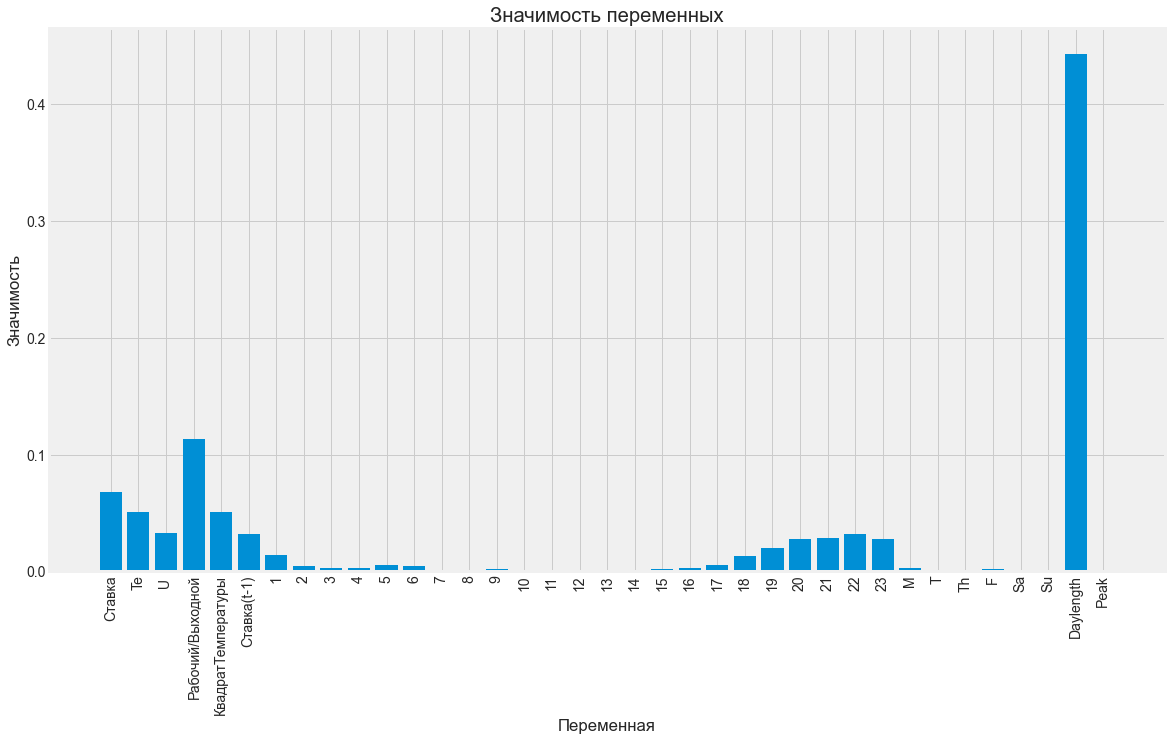

In [67]:
#%matplotlib inline
# Установить стиль
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Сделать гистограмму
plt.bar(x_values, importances, orientation = 'vertical')
# Галочки меток для оси x
plt.xticks(x_values, feature_list, rotation='vertical')
# Оси метки и заголовок
plt.ylabel('Значимость'); plt.xlabel('Переменная'); plt.title('Значимость переменных');
plt.show()

# Модель Хольта-Винтерса

Модель Хольта-Винтерса использует идеи модели экспоненциального сглаживания, но является более сложной и может применяться к рядам, содержащим тенденцию и сезонность. 

In [87]:
len(firstMonth['Потребление'])

744

In [88]:
train=firstMonth['Потребление'][0:720]
test=firstMonth['Потребление']

In [89]:
fit1 = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='mul').fit()

In [90]:
fit1.params

{'smoothing_level': 0.8421052503436977,
 'smoothing_slope': 0.052631577739683195,
 'smoothing_seasonal': 0.15789473321016853,
 'damping_slope': nan,
 'initial_level': 11565.918168948267,
 'initial_slope': 14.007032752768641,
 'initial_seasons': array([0.83126164, 0.89413697, 0.95082309, 0.98124206, 0.9783897 ,
        0.98854467, 0.98587553, 0.97982525, 0.96959005, 0.94153799,
        0.91842592, 0.91281968, 0.94327594, 0.95069816, 0.93450412,
        0.91407282, 0.89125319, 0.85964474, 0.82456327, 0.79723445,
        0.77960483, 0.76899324, 0.77125287, 0.78682086]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

'smoothing_level', 'smoothing_slope', 'smoothing_seasonal' – это постоянные сглаживания для основного ряда данных, тренда и сезонности;
'initial_level' – начальный уровень основного ряда данных;
'initial_slope' – начальный уровень тренда;
'initial_seasons' – начальные значения коэффициентов сезонности.

In [91]:
fit1.fittedvalues

0       9625.947609
1      10674.756349
2      10823.139724
3      10482.162916
4      10185.024134
           ...     
715    12604.541033
716    12168.217929
717    12122.698553
718    12057.573920
719    12047.162285
Length: 720, dtype: float64

In [92]:
fit1.forecast(24)


720    12463.193181
721    13523.220304
722    15002.492169
723    15853.185004
724    16028.943752
725    15877.240310
726    15689.044475
727    15201.732593
728    15105.462893
729    14998.003219
730    14749.033061
731    14535.720400
732    14580.293540
733    14995.319787
734    14744.399313
735    14300.910826
736    14011.102846
737    13358.141558
738    12733.240636
739    12184.417711
740    11886.204835
741    11629.739378
742    11655.663541
743    11703.068548
dtype: float64

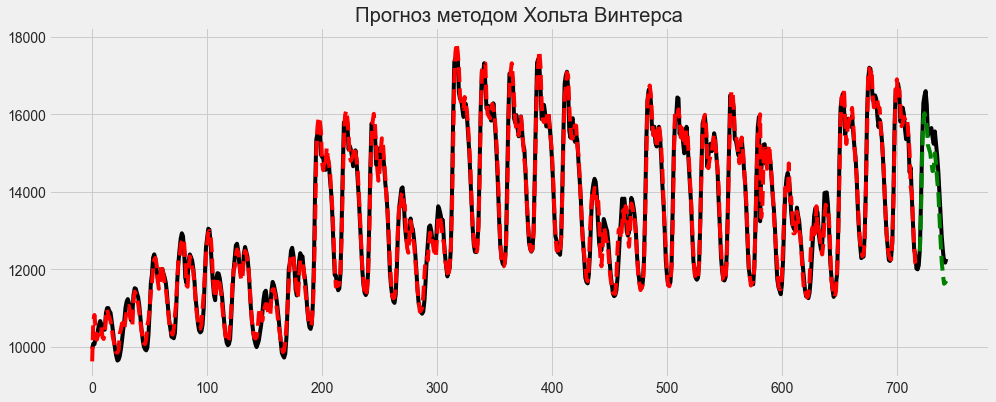

In [93]:
ax = firstMonth['Потребление'].plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(24).plot(ax=ax, style='--', color='green')
plt.show()

Оценка качества и точности математических моделей

In [94]:
metrics(train, fit1.fittedvalues)

Тест на стационарность:
	T-статистика = -9.415
	P-значение = 0.000
Критические значения :
	1%: -3.4396596024765795 - Данные  стационарны с вероятностью 99% процентов
	5%: -2.86564834926679 - Данные  стационарны с вероятностью 95% процентов
	10%: -2.568957779286756 - Данные  стационарны с вероятностью 90% процентов
MAD: 194.8009
MSE: 74451.7942
MAPE: 0.0147
MPE: -0.0001
Стандартная ошибка: 272.8586


<h1>SARIMA</h1>

Автокорреляции

In [101]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

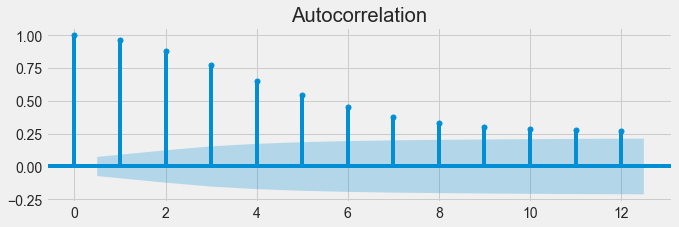

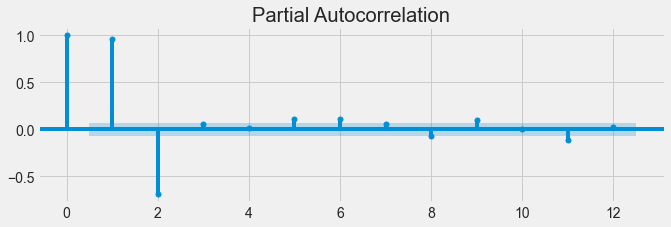

In [102]:
plt.rcParams.update({'figure.figsize': (10,3)})
plot_acf(train, lags=12)
plot_pacf(train, lags=12)
plt.show()

In [103]:
model = auto_arima(train, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True,trend="t")
model

NameError: name 'auto_arima' is not defined